In [112]:
import networkx as nx
import seaborn as sns
from pathlib import Path
import torch
import DQN_agent_modular
from envs.GraphEnv.impnode import ImpnodeEnv
from test_and_compare import test_loop, hda
import matplotlib.pyplot as plt
import  numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
import random

seed = 412
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)


In [114]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

RESULTS_BASEPATH_TEST1 = 'results\hyp_search_2\cuda_0.001_4000_1000_0.99_128_1500_300_1.0_0.05_300_0.001_4_2_32_64_1_3_(30, 50)_dw_nd_barabasi_albert_20240407152655'



In [115]:
dqn_agent_test = DQN_agent_modular.DQNAgent(device=device,
                                            alpha=0.001,
                                    gnn_depth=4,
                                    state_size=2,
                                    hidden_size1=32,
                                    hidden_size2=64,
                                    action_size=1,
                                    discount=0.0,
                                    eps_max=0.0,
                                    eps_min=0.0,
                                    eps_step=0.0,
                                    memory_capacity=0,
                                    lr=0,
                                    mode='test')

dqn_agent_test.load_model('{}/model.pt'.format(RESULTS_BASEPATH_TEST1))

In [116]:
subdir = 'data/real/Cost'
file_name = 'WS_degree.gml'
data_path = Path.cwd()/subdir

graph=nx.read_gml(data_path/file_name)

In [117]:

NUM_TEST_EPS = 1 # number of test episodes to run

hda_actions, hda_reward_history, hda_ep_score_history = hda('dw_nd', NUM_TEST_EPS, data_path, file_name)

env_test = ImpnodeEnv(anc='dw_nd', 
                       g_type='barabasi_albert', 
                       num_nodes=(30,50), 
                       mode='test',
                       data_path=data_path, file_name=file_name)
# test the agent
actions, reward_history, ep_score_history = test_loop(env=env_test,
                                                        agent=dqn_agent_test,
                                                        NUM_TEST_EPS = NUM_TEST_EPS)

In [118]:
dqn_agent_test_finetuned = DQN_agent_modular.DQNAgent(device=device,
                                            alpha=0.001,
                                    gnn_depth=4,
                                    state_size=2,
                                    hidden_size1=32,
                                    hidden_size2=64,
                                    action_size=1,
                                    discount=0.0,
                                    eps_max=0.0,
                                    eps_min=0.0,
                                    eps_step=0.0,
                                    memory_capacity=0,
                                    lr=0,
                                    mode='test')

dqn_agent_test_finetuned.load_model('{}/WS_finetuned_model.pt'.format(RESULTS_BASEPATH_TEST1))

In [119]:

f_actions, f_reward_history, f_ep_score_history = test_loop(env=env_test,
                                                        agent=dqn_agent_test_finetuned,
                                                        NUM_TEST_EPS = NUM_TEST_EPS)


not finetuned 0.4111
finetuned 0.3969


<Axes: >

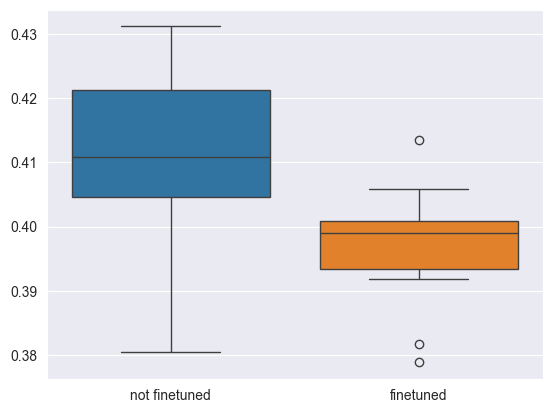

In [120]:
subdir = 'data/cm/WS_degree_val'

data_path = Path.cwd()/subdir

NUM_TEST_EPS = 10 # number of test episodes to run


env_test2 = ImpnodeEnv(anc='dw_nd', g_type='barabasi_albert', num_nodes=(30, 50), data_path=data_path,mode='test')
actions3, reward_history3, ep_score_history3 = test_loop(env=env_test2,
                                                        agent=dqn_agent_test,
                                                        NUM_TEST_EPS = NUM_TEST_EPS)
# test the agent
actions4, reward_history4, ep_score_history4 = test_loop(env=env_test2,
                                                        agent=dqn_agent_test_finetuned,
                                                        NUM_TEST_EPS = NUM_TEST_EPS)

ep_score2 = {'not finetuned':ep_score_history3, 'finetuned':ep_score_history4}

print(f'not finetuned %.4f' %(np.mean(ep_score_history3)))
print(f'finetuned %.4f' %(np.mean(ep_score_history4)))
sns.boxplot(ep_score2)

{'ImpNode_ANC': [0.49521599999999977], 'ImpNode_ANC_finetune': [0.49411449999999957]}


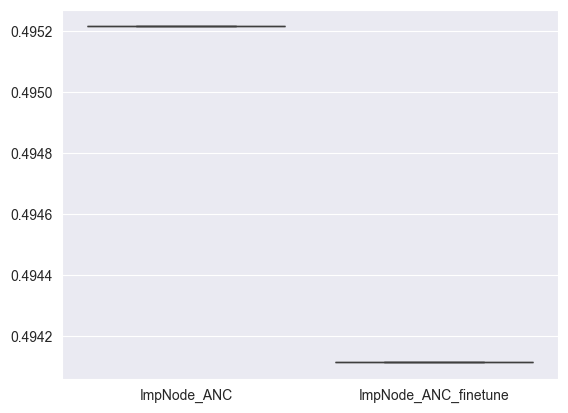

In [121]:
ep_score = {'ImpNode_ANC':ep_score_history, 'ImpNode_ANC_finetune':f_ep_score_history}
sns.boxplot(ep_score)
print(ep_score)

<Axes: >

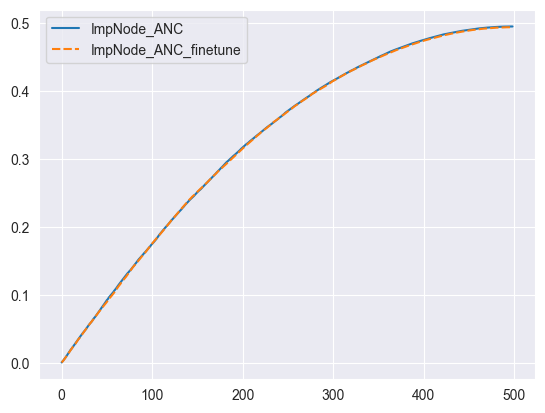

In [122]:
cum_sum_reward_his = np.cumsum(reward_history)
cum_sum_hda_reward_his = np.cumsum(f_reward_history)
sns.lineplot({'ImpNode_ANC':cum_sum_reward_his, 'ImpNode_ANC_finetune':cum_sum_hda_reward_his})